In [373]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as sp
import networkx as nx

%matplotlib inline
#%load_ext line_profiler

from matplotlib import rc
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'axes.linewidth': 2}
plt.rcParams.update(params)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2

# simple grid world
functions to be defined:
* set initial and end position
* generate set of graphs with at least one path from inital to end pos
* take that set of graphs and generate graphs with rewards and punishments
    * rules for (R,P):
        * only one reward
        * maximum M punishments
        * at least one path without punishment

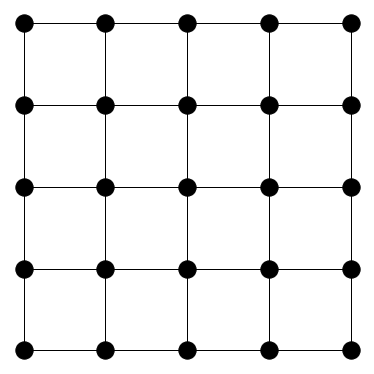

In [374]:
grid_size = 5
G = nx.grid_2d_graph(grid_size,grid_size)

plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='k', 
        with_labels=False,
        node_size=300)

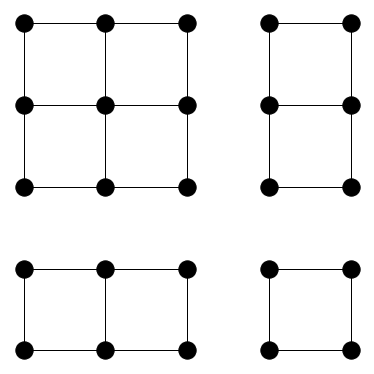

In [375]:
for i in range(grid_size):
    try:
        G.remove_edge((i,2),(i,3))
        G.remove_edge((2,i),(3,i))
    except Exception:
        pass

plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='k', 
        with_labels=False,
        node_size=300)

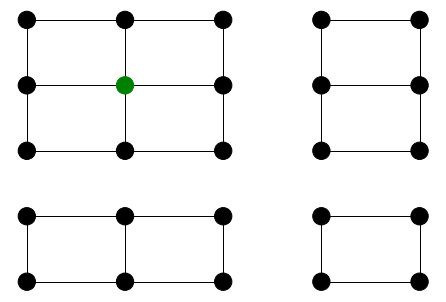

In [376]:
init_state = (1,1)
nc = ['g' if node == init_state else 'k' for node in G.nodes]
nx.draw(G, pos=pos, 
        node_color=nc, 
        with_labels=False,
        node_size=300)

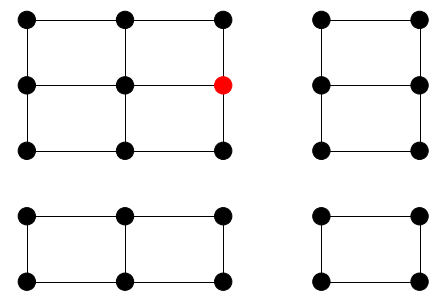

In [377]:
nc = ['r' if node == get_next_state(G, init_state, 3) else 'k' for node in G.nodes]
nx.draw(G, pos=pos, 
        node_color=nc, 
        with_labels=False,
        node_size=300)

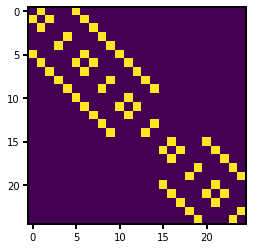

In [378]:
plot_graph_matrix(G)

In [379]:
def plot_graph_matrix(G):
    plt.imshow(nx.to_numpy_matrix(G))
    
def init_state(G):
    return list(G.nodes)[np.random.randint(len(G.nodes))]

In [380]:
def get_next_state(G, current_state, action):
    # given an initial state, outputs the next state after action is taken
    # need to insert rewards/punishments (probably should be a data structure)
    
    # get all edges of current_state node
    neigh_edges = G.edges(current_state)
    
    valid_state = False
    valid_transition = False
    
    if action == 0: #UP
        next_state = (current_state[0]-1, current_state[1])
    if action == 1: #DOWN
        next_state = (current_state[0]+1, current_state[1])    
    if action == 2: #LEFT
        next_state = (current_state[0], current_state[1]-1)    
    if action == 3: #RIGHT
        next_state = (current_state[0], current_state[1]+1)
        
    # check if next state is valid
    
    for node in G.nodes:
        if next_state == node:
            valid_state = True
    
    for edge in neigh_edges:
        if next_state == edge[1]:
            valid_transition = True
    
    if (valid_state & valid_transition):
        return next_state
    else:
        return current_state

# generate valid graphs
Rules:
* no isolated states - complete graph (formal definition)
* start and end state conditions
    * at least one path between start and end state
        * at least one path without punishments
        * this implies that we need to have at least 2 different paths for rewards

In [381]:
# generate basic graph

In [382]:
def draw_graph(G):
    plt.figure(figsize=(3,3))
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    nx.draw(G, pos=pos, 
            node_color='k', 
            with_labels=False,
            node_size=300)

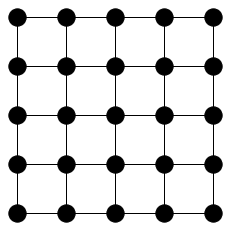

In [383]:
grid_size = 5
G = nx.grid_2d_graph(grid_size,grid_size)
draw_graph(G)

((1, 2), (1, 3))
((1, 0), (2, 0))
((3, 2), (3, 3))
((0, 0), (0, 1))
((0, 3), (1, 3))


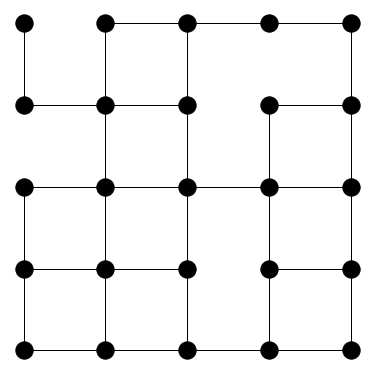

In [384]:
# remove some edges
n_edges = len(list(G.edges))
n_rm_edge = 5
for i in range(n_rm_edge):
    random_edge = list(G.edges)[np.random.randint(n_edges)]
    G.remove_edge(random_edge[0],random_edge[1])
    print(random_edge)

plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='k', 
        with_labels=False,
        node_size=300)

# generate a bunch of mazes and check if they're connected
* basic idea is to generate all NxN connected mazes without a subset of edges

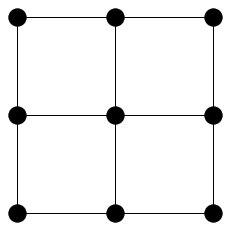

In [395]:
grid_size = 3
G = nx.grid_2d_graph(grid_size,grid_size)
draw_graph(G)

((0, 0), (1, 0))
((0, 0), (0, 1))
((1, 2), (2, 2))
((1, 1), (1, 2))
((1, 0), (1, 1))


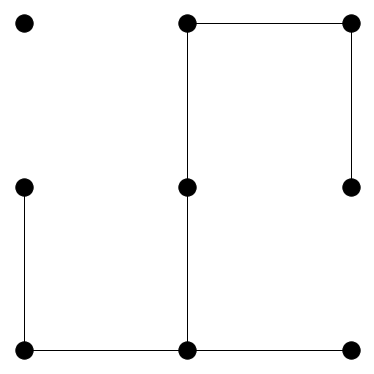

In [396]:
# remove some edges
n_edges = len(list(G.edges))
n_rm_edge = 5
for i in range(n_rm_edge):
    random_edge = list(G.edges)[np.random.randint(n_edges)]
    G.remove_edge(random_edge[0],random_edge[1])
    print(random_edge)

plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='k', 
        with_labels=False,
        node_size=300)

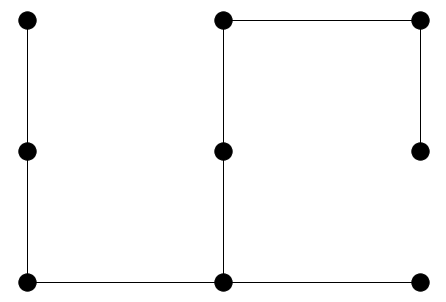

In [397]:
G.add_edge((0,0),(1,0))
nx.draw(G, pos=pos, 
        node_color='k', 
        with_labels=False,
        node_size=300)

In [398]:
nx.is_connected(G)

True

# implement SARSA on a complete gridworld
* first run normal sarsa
* then do RBF approximation with split positive and negative RPEs
* for a complete grid world, see how scaling affects performance

### gridworld rules
* set R rewards and P punishments
* punished states are end states and terminate trial
* rewarded states also

In [327]:
grid_size = 5
G = nx.grid_2d_graph(grid_size,grid_size)
draw_graph(G)

TypeError: draw_graph() missing 2 required positional arguments: 'r_pos' and 'p_pos'

In [366]:
def draw_graph(G, r_pos, p_pos, fig_size):
    plt.figure(figsize=(fig_size[0],fig_size[1]))
    
    nc = []
    for node in G.nodes:
        if node == r_pos:
            nc.append('g')
        if node == p_pos:
            nc.append('r')
        else:
            nc.append('k')
    
    del nc[-1]

    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    nx.draw(G, pos = pos, 
            node_color = nc, 
            with_labels = False,
            node_size=300)

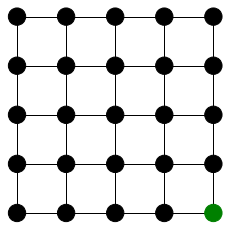

In [230]:
draw_graph(G, (4,4), False)

# grid world rules with reward and punishment

In [283]:
# define new environment function with reward and punishment
def get_next_state_v2(G, current_state, action, R, P):
    # given an initial state, outputs the next state after action is taken
    # need to insert rewards/punishments (probably should be a data structure)
    # R is a vector with the positions of rewards and punishments
    
    reward = 0
    
    # get all edges of current_state node
    neigh_edges = G.edges(current_state)
    
    valid_state = False
    valid_transition = False
    terminal_flag = False
    
    if action == 0: #UP
        next_state = (current_state[0]-1, current_state[1])
    if action == 1: #DOWN
        next_state = (current_state[0]+1, current_state[1])    
    if action == 2: #LEFT
        next_state = (current_state[0], current_state[1]-1)    
    if action == 3: #RIGHT
        next_state = (current_state[0], current_state[1]+1)
    
    # check if next state is valid
    
    if next_state == R[0]:
        reward = R[1]
        terminal_flag = True
        # need to do the same for punishments
    
    for node in G.nodes:
        if next_state == node:
            valid_state = True
    
    for edge in neigh_edges:
        if next_state == edge[1]:
            valid_transition = True
    
    if (valid_state & valid_transition) == False:
        return current_state, reward, terminal_flag
    else:
        return next_state, reward, terminal_flag
        

# sofmtax policy

In [236]:
def pi(Q, beta):

    x = Q - Q.max(axis=None, keepdims=True)
    y = np.exp(x * beta)

    # replacing infinite values by 1
    for i, e in enumerate(y):
        if np.isinf(e):
            y[i] = 1

    # normalizing to get probabilities
    action_prob = y / y.sum(axis=None, keepdims=True)
    selected_action = np.argmax(np.random.multinomial(1, action_prob, size=1))

    return selected_action

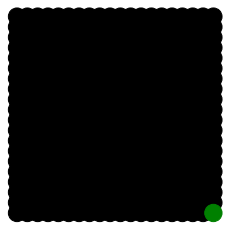

In [347]:
grid_size = 20
G = nx.grid_2d_graph(grid_size,grid_size)
draw_graph(G, (grid_size-1,grid_size-1), False)

In [367]:
grid_size = 10
G = nx.grid_2d_graph(grid_size,grid_size)
len(nx.shortest_path(G, source=(0,0), target=(grid_size-1, grid_size-1)))

19

# SARSA

In [368]:
n_epochs = 1000
n_steps = 70

n_states = grid_size ** 2
n_actions = 4
#Q = np.random.uniform(0,0.1,(n_states, n_actions))
Q = np.zeros((n_states, n_actions))
Q_pre = Q

#plt.imshow(Q_pre)
#plt.show()

r_pos = (grid_size-1,grid_size-1)
r_mag = 1
R = [r_pos, r_mag]
beta = 5
alpha = 0.01
gamma = 0.98
tf = False

for ep in range(n_epochs):
    cn = (0,0) # current node
    nn = (0,0) # next node
    a = np.random.randint(n_actions)
    for step in range(n_steps):
        cs = [i for i,e in enumerate(list(G.nodes)) if e == cn][0] # current state
        ns = [i for i,e in enumerate(list(G.nodes)) if e == nn][0] # next state
        a = pi(Q[cs,:], beta)
        #print(cs, ns, a, cn, nn)
        nn, r, tf = get_next_state_v2(G, cn, a, R, False)
        na = pi(Q[ns,:], beta)
        Q[cs, a] += alpha * (r + gamma * Q[ns, na] - Q[cs, a])
        cn = nn
        if tf:
            break

In [369]:
# turn Q into a grid matrix for each action
Q_m = np.zeros((grid_size, grid_size, n_actions))
for i in range(grid_size):
    for j in range(grid_size):
        for a in range(n_actions):
            st = [k for k,e in enumerate(list(G.nodes)) if e == (i,j)][0]
            Q_m[i,j,a] = Q[st,a]

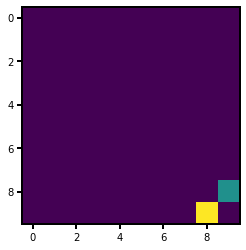

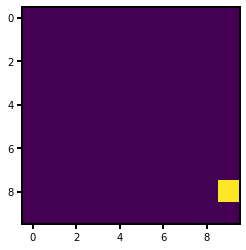

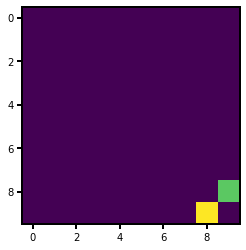

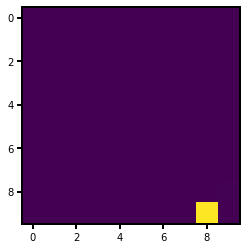

In [370]:
for a in range(n_actions):
    plt.imshow(Q_m[:,:,a])
    plt.show()